In [1]:
from typing import Callable

import torch
import numpy
import matplotlib.pyplot as plt

from utilities import CostParameters, least_square_cost, ridge_cost

In [2]:
torch.set_default_dtype(torch.float64)
if torch.cuda.is_available():
    torch.set_default_device("cuda")

In [3]:
TEST_DATA_SIZE = 100
X = numpy.random.rand(TEST_DATA_SIZE, 1)
Y = numpy.random.rand(TEST_DATA_SIZE, 1)
Z = numpy.random.rand(TEST_DATA_SIZE, 1)

In [4]:
input_layer = 2
output_layer = 1
learning_rate = 1e-5

def train(hidden_layer: int, epochs: int, cost_func: Callable[[CostParameters], torch.Tensor], print_debug_info: bool = False) -> None:
    x_tensor = torch.tensor(numpy.concatenate((X, Y), axis=1))
    y_tensor = torch.tensor(Z)

    weights_layer1 = torch.rand(input_layer, hidden_layer, requires_grad=True)
    biases_layer1 = torch.rand(hidden_layer, requires_grad=True)
    weights_layer2 = torch.rand(hidden_layer, output_layer, requires_grad=True)
    biases_layer2 = torch.rand(output_layer, requires_grad=True)

    def predict() -> torch.Tensor:
        return (x_tensor @ weights_layer1 + biases_layer1) @ weights_layer2 + biases_layer2

    for i in range(epochs):
        predicted = predict()

        cost_params = CostParameters(y_tensor, predicted, [weights_layer1, weights_layer2], [biases_layer1, biases_layer2])
        loss = cost_func(cost_params)

        if print_debug_info:
            iteration_id = i + 1
            if iteration_id % 500 == 0:
                print(f"Info at epoch #{iteration_id}:")
                print(f"Loss: {loss.item()}")

        loss.backward()

        with torch.no_grad():
            weights_layer1 -= learning_rate * weights_layer1.grad
            biases_layer1 -= learning_rate * biases_layer1.grad
            weights_layer2 -= learning_rate * weights_layer2.grad
            biases_layer2 -= learning_rate * biases_layer2.grad

            weights_layer1.grad = None
            biases_layer1.grad = None
            weights_layer2.grad = None
            biases_layer2.grad = None

    final_prediction = numpy.array(predict().detach().cpu())

    sub_plot = plt.figure().add_subplot(projection="3d")
    sub_plot.set_title(f"Training a 3D regression model with {hidden_layer} neurons within the hidden layer after {epochs} epochs")

    sub_plot.plot_trisurf(X.reshape(TEST_DATA_SIZE), Y.reshape(TEST_DATA_SIZE), final_prediction.reshape(TEST_DATA_SIZE), color="g", alpha=0.6)
    sub_plot.scatter(X, Y, Z)
    plt.show()

Info at epoch #500:
Loss: 9.020418309655039
Info at epoch #1000:
Loss: 8.942795404615353
Info at epoch #1500:
Loss: 8.891580152112349
Info at epoch #2000:
Loss: 8.845185307569633
Info at epoch #2500:
Loss: 8.802759803732352
Info at epoch #3000:
Loss: 8.76385361406012
Info at epoch #3500:
Loss: 8.728081965938141
Info at epoch #4000:
Loss: 8.6951106859722
Info at epoch #4500:
Loss: 8.66464838808138
Info at epoch #5000:
Loss: 8.636440079554202


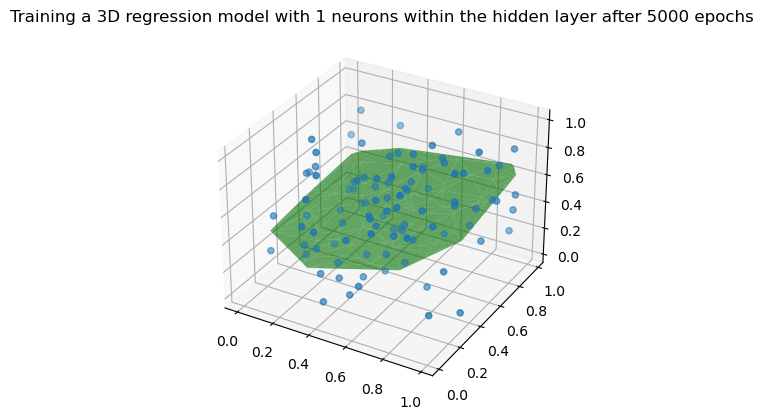

Info at epoch #500:
Loss: 10.70319287406142
Info at epoch #1000:
Loss: 10.221011080814083
Info at epoch #1500:
Loss: 9.83792043509733
Info at epoch #2000:
Loss: 9.529618647412967
Info at epoch #2500:
Loss: 9.278857608365428
Info at epoch #3000:
Loss: 9.073095847999703
Info at epoch #3500:
Loss: 8.903018880302042
Info at epoch #4000:
Loss: 8.761578677463323
Info at epoch #4500:
Loss: 8.643353718199808
Info at epoch #5000:
Loss: 8.5441126158067


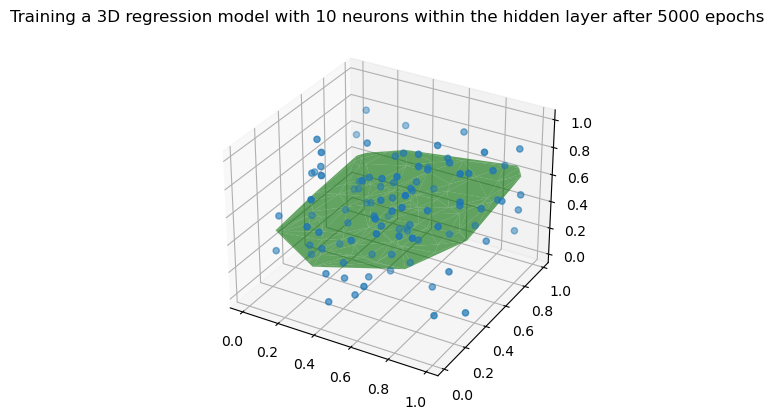

Info at epoch #500:
Loss: 14.492792921026268
Info at epoch #1000:
Loss: 8.659325393560568
Info at epoch #1500:
Loss: 8.052666763940795
Info at epoch #2000:
Loss: 7.989200966163727
Info at epoch #2500:
Loss: 7.982554463852951
Info at epoch #3000:
Loss: 7.98185820598378
Info at epoch #3500:
Loss: 7.9817852617425284
Info at epoch #4000:
Loss: 7.981777619346919
Info at epoch #4500:
Loss: 7.981776818636578
Info at epoch #5000:
Loss: 7.981776734743808


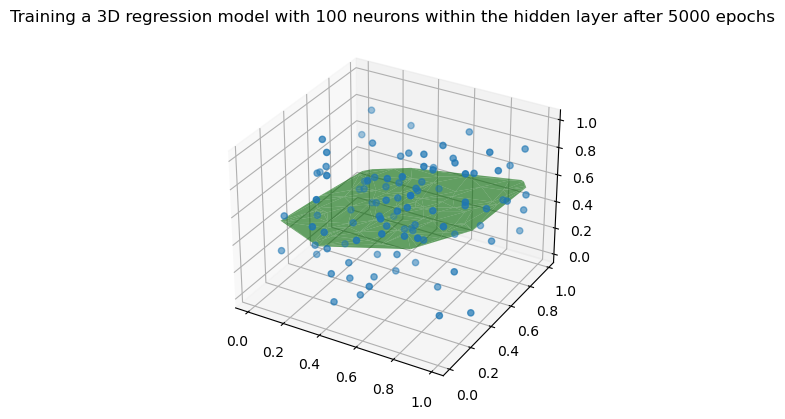

In [5]:
train(1, 5_000, least_square_cost, print_debug_info=True)
train(10, 5_000, least_square_cost, print_debug_info=True)
train(100, 5_000, least_square_cost, print_debug_info=True)


Info at epoch #500:
Loss: 9.294769474735501
Info at epoch #1000:
Loss: 8.987006899452942
Info at epoch #1500:
Loss: 8.96511721819271
Info at epoch #2000:
Loss: 8.954679459171702
Info at epoch #2500:
Loss: 8.945153432618877
Info at epoch #3000:
Loss: 8.936110335448364
Info at epoch #3500:
Loss: 8.927504766219391
Info at epoch #4000:
Loss: 8.919308006460062
Info at epoch #4500:
Loss: 8.911493992268698
Info at epoch #5000:
Loss: 8.90403859970827


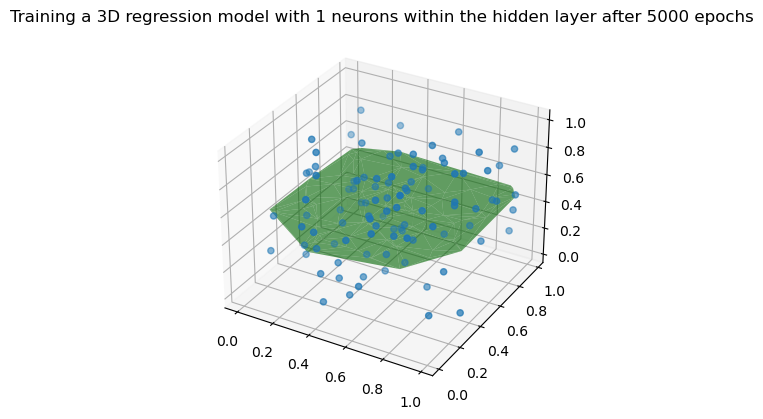

Info at epoch #500:
Loss: 11.58645523036407
Info at epoch #1000:
Loss: 11.156100812191283
Info at epoch #1500:
Loss: 10.820262515170239
Info at epoch #2000:
Loss: 10.5553454897034
Info at epoch #2500:
Loss: 10.344576534897774
Info at epoch #3000:
Loss: 10.175730264077913
Info at epoch #3500:
Loss: 10.039706559789444
Info at epoch #4000:
Loss: 9.929611199925711
Info at epoch #4500:
Loss: 9.840144128016547
Info at epoch #5000:
Loss: 9.767181446164741


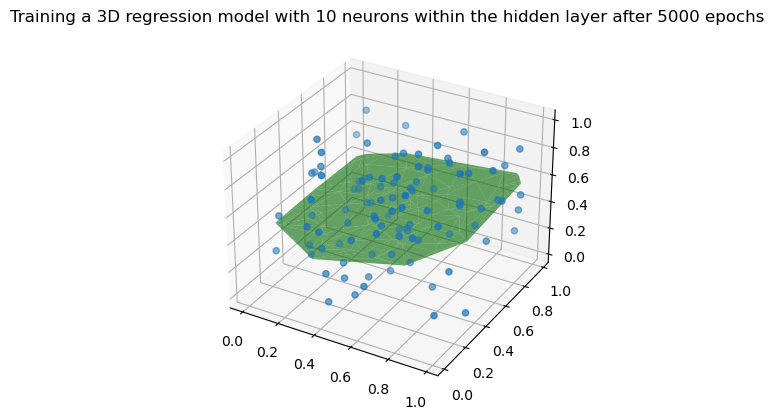

Info at epoch #500:
Loss: 20.699492423529072
Info at epoch #1000:
Loss: 14.31718933990236
Info at epoch #1500:
Loss: 13.697095800326343
Info at epoch #2000:
Loss: 13.633465672795086
Info at epoch #2500:
Loss: 13.62486240503826
Info at epoch #3000:
Loss: 13.621750427822306
Info at epoch #3500:
Loss: 13.619189075188764
Info at epoch #4000:
Loss: 13.61668311543707
Info at epoch #4500:
Loss: 13.614182743579963
Info at epoch #5000:
Loss: 13.611682937228373


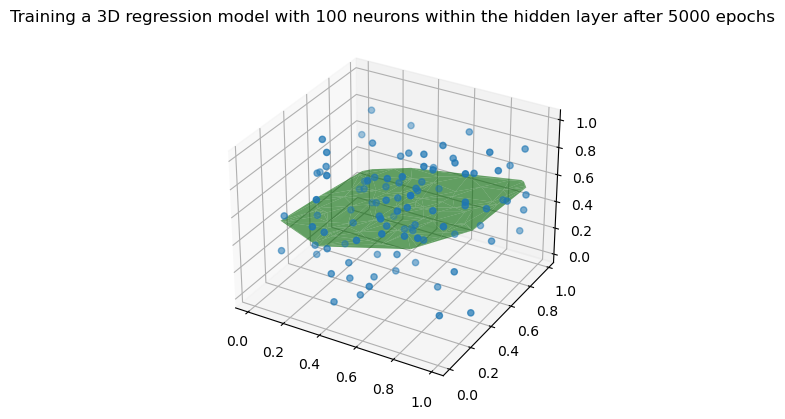

In [6]:
train(1, 5_000, ridge_cost(least_square_cost, 0.5), print_debug_info=True)
train(10, 5_000, ridge_cost(least_square_cost, 0.5), print_debug_info=True)
train(100, 5_000, ridge_cost(least_square_cost, 0.5), print_debug_info=True)